<a href="https://colab.research.google.com/github/Loreadad/Trabajo_final_ITBA/blob/main/Diplomatura_Phyton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 Seleccione una opción: 
1) Actualización de datos
2) Visualización de datos
1

 Ingrese ticker a pedir:aal

 Ingrese fecha de inicio (YYYY-MM-DD): 2022-09-28

 Ingrese fecha de inicio (YYYY-MM-DD): 2022-09-28

 Pidiendo datos ...

 Datos guardados correctamente

 Seleccione una opción: 
1) Actualización de datos
2) Visualización de datos
2

 Seleccione una opción: 
1) Resumen
2) Gráfico de ticker
1

 Los tickers guardados en la base de datos son:
1. AAL - 2022-08-01 <-> 2022-08-01
2. AAL - 2022-08-02 <-> 2022-08-02
3. QQQ - 2022-09-01 <-> 2022-09-01
4. QQQ - 2022-10-03 <-> 2022-10-03
5. TSLA - 2022-10-06 <-> 2022-10-06
6. TSLA - 2022-08-29 <-> 2022-08-29
7. TSLA - 2022-08-10 <-> 2022-08-10
8. AAPL - 2022-08-09 <-> 2022-08-09
9. QQQ - 2022-09-22 <-> 2022-09-22
10. QQQ - 2022-08-31 <-> 2022-08-31
11. AAP - 2021-01-02 <-> 2021-02-02
12. AAP - 2021-01-02 <-> 2021-02-02
13. AAP - 2021-01-02 <-> 2021-02-02
14. AAP - 2021-01-02 <-> 2021-02-02
15. AAP - 2021-01-02 <-> 2021-02-02
16. AAP - 20

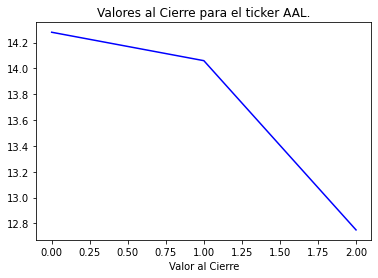

KeyboardInterrupt: ignored

In [5]:
import requests
import sqlite3 as sql
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


# Acceso al Menú Principal
def home():
    menu_principal = input('\n Seleccione una opción: \n1) Actualización de datos\n2) Visualización de datos\n')

#1) Actualización de datos
    if menu_principal == '1':

    # Se piden los parametros de ticker, fecha inicio y fecha fin
      ticker = input('\n Ingrese ticker a pedir:').upper()
      fecha_inicio = input("\n Ingrese fecha de inicio (YYYY-MM-DD): ")
      año, mes, dia = map(int, fecha_inicio.split('-'))
      fecha_fin = input("\n Ingrese fecha de inicio (YYYY-MM-DD): ")
      año, mes, dia = map(int, fecha_fin.split('-'))


      #  Se realiza la conexión a la API
      try:
          print('\n Pidiendo datos ...')
          ticker_get = requests.get(f'https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{fecha_inicio}/{fecha_fin}?adjusted=true&sort=asc&limit=120&apiKey=G_Yb5HG6ldlS0k0SHQdr8w6Q4FKYJEVE')
          objeto_api = ticker_get.json()
      except:
          print('\n No se puede conectar a la API. Por favor, reintente nuevamente.')    

      #  Almacenamiento en la base de datos
      if objeto_api['resultsCount'] != 0:

          try:
              conexion = sql.connect('trabajo_final.db')
              cursor = conexion.cursor()
          except:
              print('\n No se puede conectar a la base de datos. Por favor, reintente nuevamente.')

          for x in range(len(objeto_api['results'])):
              valor_cierre = objeto_api['results'][x]['c']

              cursor.execute(f'''INSERT INTO api_polygon (ticker, fecha_inicio, fecha_fin, cierre) VALUES ('{ticker}', '{fecha_inicio}', '{fecha_fin}', '{valor_cierre}');''')
              conexion.commit()
          
          cursor.close()

          print(f'\n Datos guardados correctamente')

      else:
          print('\n No se pudieron guardar los datos en la base. Por favor, reintente nuevamente.')

#2) Visualización de datos
    elif menu_principal == '2':

        opcion_submenu = input('\n Seleccione una opción: \n1) Resumen\n2) Gráfico de ticker\n')

    #1) Resumen
        if opcion_submenu == '1':

            try:
                conexion = sql.connect('trabajo_final.db')
                cursor = conexion.cursor()
                resumen_tabla = cursor.execute('''SELECT id, ticker, fecha_inicio, fecha_fin FROM api_polygon;''').fetchall()

                print('\n Los tickers guardados en la base de datos son:')

                for x in range (len(resumen_tabla)):
                    print(f'{x+1}. {resumen_tabla[x][1]} - {resumen_tabla[x][2]} <-> {resumen_tabla[x][3]}')

            except:
                print('\n No se pudo obtener los datos solicitados. Por favor, reintente nuevamente.')
            finally:
                conexion.close()

    #2) Gráfico de ticker
        if opcion_submenu == '2':

                ticker_grafico = input('\n Ingrese el ticker a graficar:').upper()

                try:
                    conexion = sql.connect('trabajo_final.db')
                    cursor = conexion.cursor()

                    cierre_grafico = cursor.execute(f'''SELECT cierre FROM api_polygon WHERE ticker = "{ticker_grafico}";''').fetchall()

                    fig, ax = plt.subplots()  # Se crea una figura que contiene un solo eje.
                    ax.plot(cierre_grafico, color='blue');  # Se trazan los datos en los ejes y se asigna el color azul para la línea del gráfico.
                    ax.set_title(f'Valores al Cierre para el ticker {ticker_grafico}.') # Indica el título del gráfico.
                    ax.set_xlabel('Valor al Cierre')  # Indica los valores que se visualizan en el eje X.
                    plt.show()  #Muestra el gráfico.

                except:
                    print('\n No se pudo obtener los datos solicitados. Por favor, reintente nuevamente.')
                finally:
                    conexion.close()
                    

        else:
            print ('\n Seleccione una opción válida.')
    else:
        print ('\n Seleccione una opción válida.')
        home()

decision = True

while decision:
    home()